<a href="https://colab.research.google.com/github/CaptainLight5/Coronary-heart-disease-prediction/blob/main/CHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

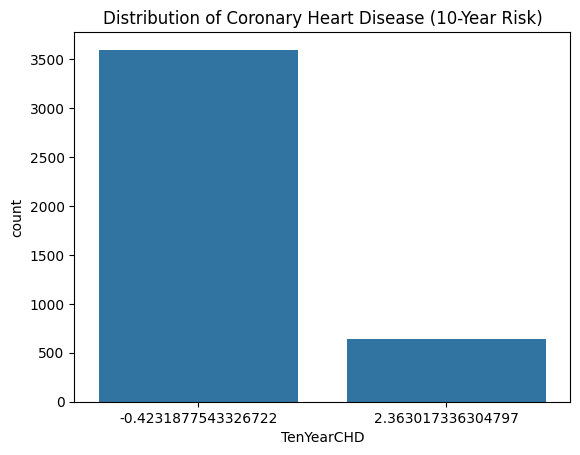

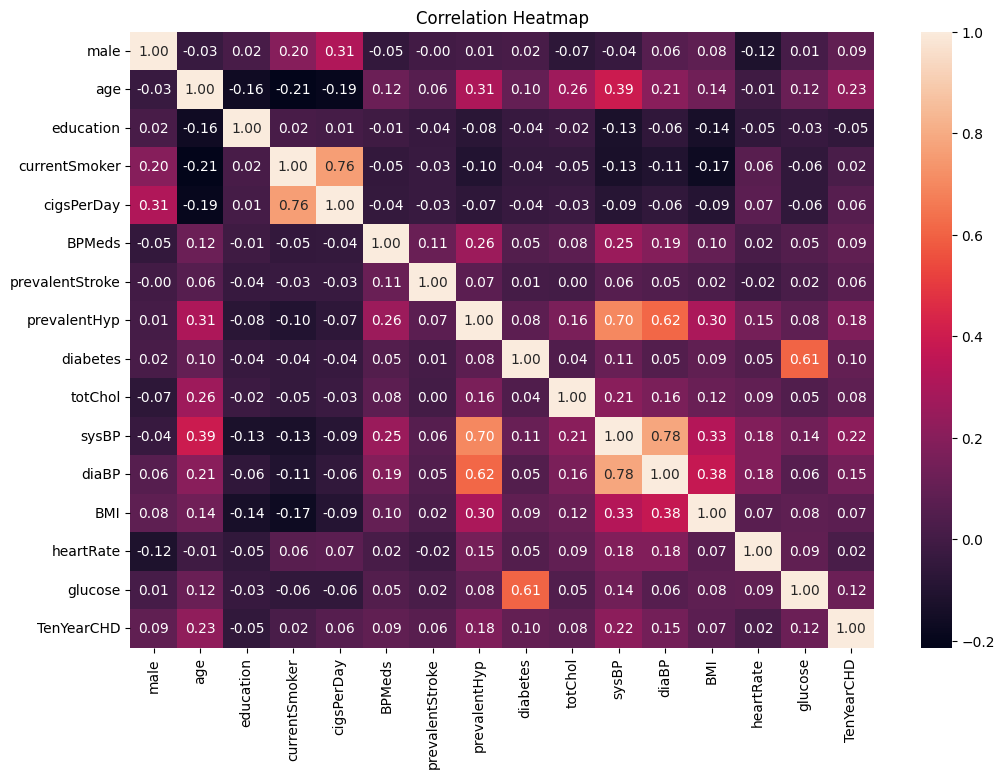

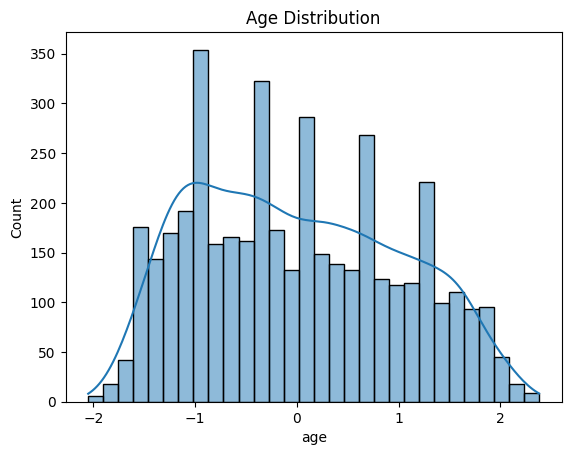

[0 2]
[0 1]
Logistic Regression Accuracy: 0.86
Logistic Regression Precision: 0.68
Gaussian Process Accuracy: 0.85
Gaussian Process Precision: 0.59
Naive Bayes Accuracy: 0.83
Naive Bayes Precision: 0.40
Support Vector Classifier Accuracy: 0.85
Support Vector Classifier Precision: 0.50
                       Model  Accuracy  Precision
0        Logistic Regression  0.855346   0.677419
1           Gaussian Process  0.850629   0.586207
2                Naive Bayes  0.828616   0.396396
3  Support Vector Classifier  0.846698   0.500000


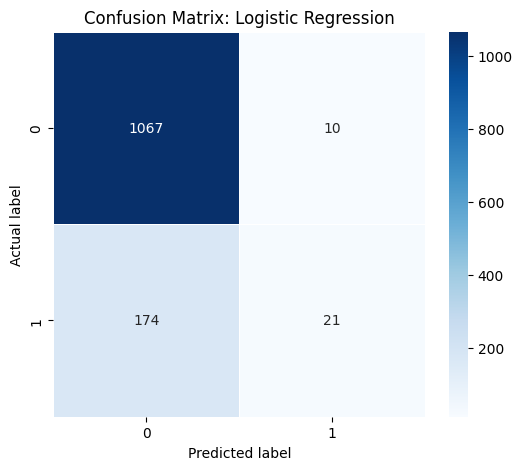

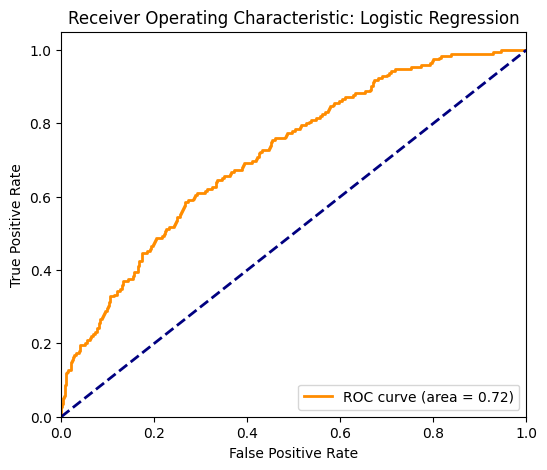

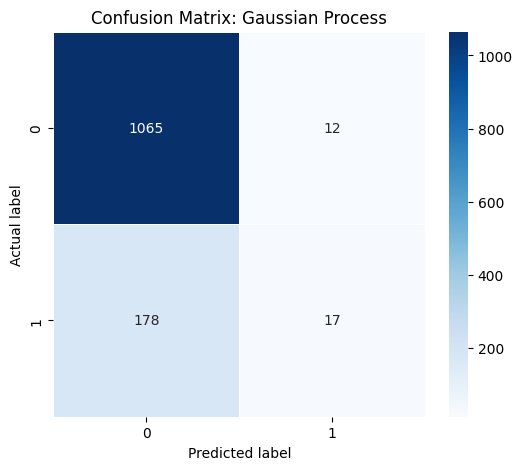

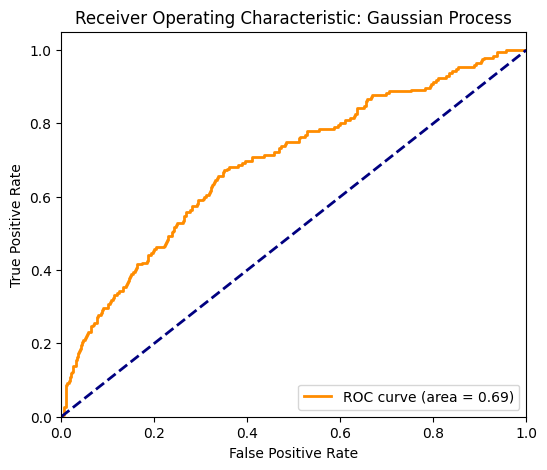

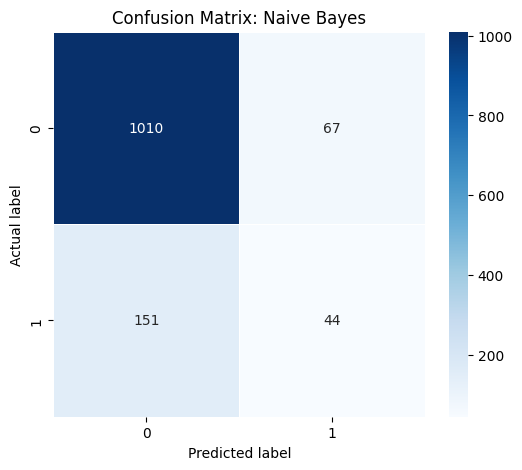

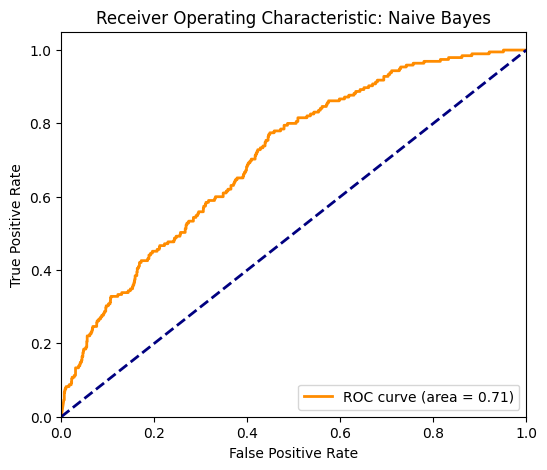

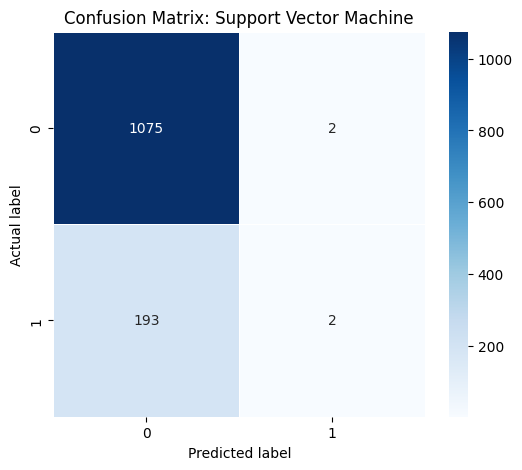

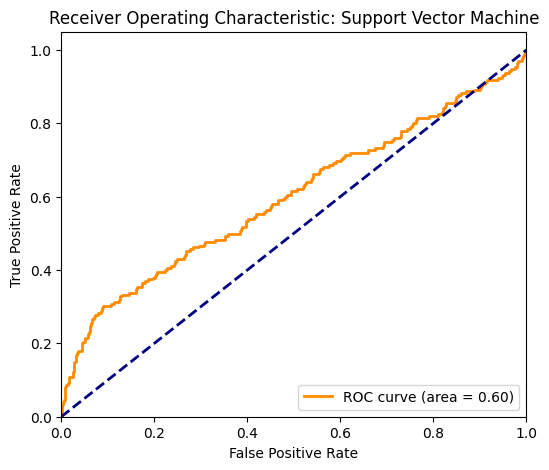

                       Model  Accuracy  Precision
0        Logistic Regression  0.855346   0.677419
1           Gaussian Process  0.850629   0.586207
2                Naive Bayes  0.828616   0.396396
3  Support Vector Classifier  0.846698   0.500000


,Model,Accuracy,Precision
0,Logistic Regression,0.855346,0.677419
1,Gaussian Process,0.850629,0.586207
2,Naive Bayes,0.828616,0.396396
3,Support Vector Classifier,0.846698,0.500000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# This is the code that loads the the dataset
file_path = '/content/framingham.csv'
df = pd.read_csv(file_path)

# This display the first few rows of the dataset
df.head()

# This is the Preprocessing steps
# This checks for missing values
df.isnull().sum()

# this fills the missing values with median for numerical columns
df.fillna(df.median(), inplace=True)

# this converts categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# this is to Standardize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# this is to Separate features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# this is the line for the distribution of the target variable
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of Coronary Heart Disease (10-Year Risk)')
plt.show()

# a Correlation heatmap was generated
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Age distribution in the dataset
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


# this Converts the target variable to integer type
y = y.astype(int)

# this Checks the unique values of the target variable to confirm
print(y.unique())


# Convert the target variable to binary (0 or 1)
y = y.replace(2, 1)
# Check the unique values of the target variable to confirm the correction
print(y.unique())


# here I Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# this Predicts and evaluates the Logistic regression model
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Logistic Regression Precision: {lr_precision:.2f}')


# Gaussian Process Classification
gp_model = GaussianProcessClassifier()
gp_model.fit(X_train, y_train)
y_pred_gp = gp_model.predict(X_test)
gp_accuracy = accuracy_score(y_test, y_pred_gp)
gp_precision = precision_score(y_test, y_pred_gp)
print(f'Gaussian Process Accuracy: {gp_accuracy:.2f}')
print(f'Gaussian Process Precision: {gp_precision:.2f}')

# Naive Bayes Classification
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print(f'Naive Bayes Precision: {nb_precision:.2f}')

# Support Vector Classification
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
print(f'Support Vector Classifier Accuracy: {svc_accuracy:.2f}')
print(f'Support Vector Classifier Precision: {svc_precision:.2f}')



# here we compare the Model Performance
models = ['Logistic Regression', 'Gaussian Process', 'Naive Bayes', 'Support Vector Classifier']
accuracies = [lr_accuracy, gp_accuracy, nb_accuracy, svc_accuracy]
precisions = [lr_precision, gp_precision, nb_precision, svc_precision]

performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions})

# this Displays the performance DataFrame
print(performance_df)


# This Function to plots the confusion matrix and ROC curve
def plot_metrics(model_name, y_test, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic: {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression Evaluation
plot_metrics("Logistic Regression", y_test, y_pred_lr, lr_model.predict_proba(X_test))

# Gaussian Process Evaluation
plot_metrics("Gaussian Process", y_test, y_pred_gp, gp_model.predict_proba(X_test))

# Naive Bayes Evaluation
plot_metrics("Naive Bayes", y_test, y_pred_nb, nb_model.predict_proba(X_test))

# Support Vector Machine Evaluation
plot_metrics("Support Vector Machine", y_test, y_pred_svc, svc_model.predict_proba(X_test))

# Comparing Model Performance
performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions})
print(performance_df)

performance_df



